In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
import os

In [65]:
os.getcwd()

'/content'

In [66]:
df=pd.read_excel('data_final.xlsx') #Uploading data File

In [67]:
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [68]:
df.info() #Getting information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


#Observation on data

In [69]:
import seaborn as sns

-0.17010152303525727
-1.178222036544501


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


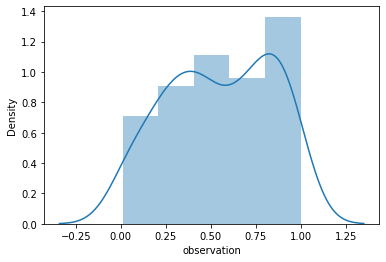

In [71]:
sns.distplot(df["observation"])
print(df["observation"].skew())
print(df["observation"].kurt())

INSIGHTT:
1. From the given data and ploted graph it is cleared that the data is equaly distributed
2. as we can see there is not any null value avilable

#Finding outtlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f393929ed30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f393929e5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f393929e880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3939372b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3939372940>],
 'means': []}

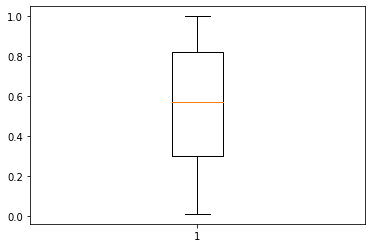

In [73]:
plt.boxplot(df["observation"])

INSIGHT:
1. From the box plot it is clear that the column observation does not contains any outlier
2. so there is no need for data cleaning

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.05603993223379983
-1.258874551769168


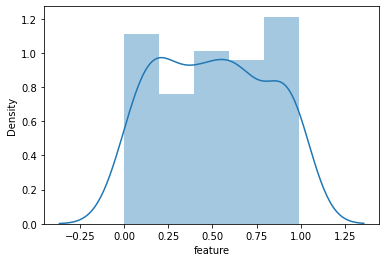

In [74]:
sns.distplot(df["feature"])
print(df["feature"].skew())
print(df["feature"].kurt())

INSIGHTT:
1. From the given data and ploted graph it is cleared that the data is equaly distributed
2. as we can see there is not any null value avilable

{'whiskers': [<matplotlib.lines.Line2D at 0x7f393911e970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f393912a070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f393911e610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f393912a730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f393912aa30>],
 'means': []}

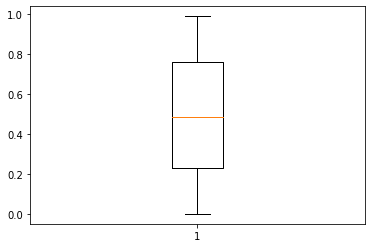

In [75]:
plt.boxplot(df["feature"])

Insight:
1. As there are not any ouutlier present in this feature so need of data cleaning is reguired

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7770100203624751
0.07685117614441195


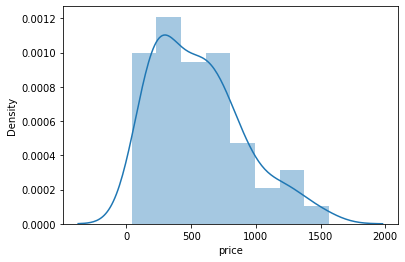

In [77]:
sns.distplot(df["price"])
print(df["price"].skew())
print(df["price"].kurt())

Insights:
1. Here also if we see the grasph the graph is equaly distributed 
2.  And there is not any null value present in Feature

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3939257eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3939257c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3939257700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f39393b7f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3939352e80>],
 'means': []}

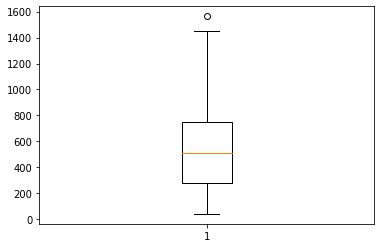

In [166]:
plt.boxplot(df["price"])

Insight:
1. We can see there is not any outlier present in Feature
2. No need of data cleaning is reaguird

#Model Build Porcess:



1. Seprating dependetn and independent variale

In [116]:
X=df.drop("price",axis=1) #Independent variable

In [117]:
Y=df["price"] #Dependent Variable

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25) #Calling and applying train test split here I am using 75-25% split pattern

In [120]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
out_mod=model.fit(X_train,y_train) #appling linear regression model by passing training dataaset to it

In [121]:
y_pred=out_mod.predict(X_test) # Preddicting the output of trrainiung dataset

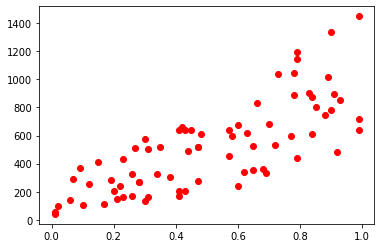

In [164]:
plt.scatter(X_train['observation'],y_train,color='red') 

Insight:
1. Here we can see the points are scatter uniformaly
2. if we tries to plot straint line it will result in underfit condition
3. so to overcome from this we have to bend out line to qudratic
4. so that We have to use polynomial Regression

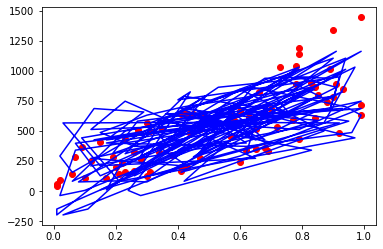

In [165]:
plt.scatter(X_train['observation'],y_train,color='red')
plt.plot(X_train,out_mod.predict(X_train),color='blue')

iNSIGHT:
1. This is just for visulation
2. here i have poassed train data to predit tthe output
3. so that it is giving  overfiting result

In [143]:
from sklearn.preprocessing import PolynomialFeatures
poly_regression= PolynomialFeatures(degree=1)
x_poly= poly_regression.fit_transform(X_train)
model1=LinearRegression()
model2=model1.fit(x_poly,y_train) #Calling polynoial regreession and giving degree to 1 as it is mentioned in probelm statment it should be less thant 4

In [144]:
x_poly

array([[1.  , 0.57, 0.43],
       [1.  , 0.89, 0.68],
       [1.  , 0.78, 0.85],
       [1.  , 0.91, 0.53],
       [1.  , 0.3 , 0.08],
       [1.  , 0.21, 0.22],
       [1.  , 0.09, 0.97],
       [1.  , 0.7 , 0.57],
       [1.  , 0.63, 0.58],
       [1.  , 0.77, 0.36],
       [1.  , 0.44, 0.64],
       [1.  , 0.22, 0.46],
       [1.  , 0.17, 0.15],
       [1.  , 0.79, 0.97],
       [1.  , 0.31, 0.87],
       [1.  , 0.38, 0.4 ],
       [1.  , 0.99, 0.91],
       [1.  , 0.78, 0.69],
       [1.  , 0.48, 0.76],
       [1.  , 0.62, 0.17],
       [1.  , 0.26, 0.62],
       [1.  , 0.15, 0.96],
       [1.  , 0.3 , 0.99],
       [1.  , 0.42, 0.94],
       [1.  , 0.83, 0.64],
       [1.  , 0.28, 0.46],
       [1.  , 0.35, 0.85],
       [1.  , 0.58, 0.62],
       [1.  , 0.47, 0.23],
       [1.  , 0.9 , 0.42],
       [1.  , 0.27, 0.95],
       [1.  , 0.19, 0.62],
       [1.  , 0.47, 0.65],
       [1.  , 0.79, 0.12],
       [1.  , 0.99, 0.23],
       [1.  , 0.12, 0.65],
       [1.  , 0.41, 0.15],
 

In [146]:
y_pred2=model2.predict(x_poly) #Predicitng output by passing test data

In [147]:
c=model2.coef_
c #FIndding coefifcient of line

array([  0.        , 840.84452574, 610.31840356])

In [167]:
m=model2.intercept_
m #Finding out intecption poiint iof line

-222.15526758392593

In [149]:
from sklearn import metrics

In [153]:
metrics.mean_absolute_error(y_pred,y_test) #$here I have calculated score of meas abosulte score

73.36813459643335

In [154]:
metrics.mean_squared_error(y_pred,y_test) #calculating mean squred error

11868.343317003115

In [168]:
metrics.r2_score(y_test,y_pred) # as I am getting R2 score as 0.86*100 so that i My model is 92% accuracte which is good>>>

0.9282120972783994